# Before entering the project space, lets break down the SVC algorithm:

## 0. PRELIMINARIES :


In [986]:
import seaborn as sns; sns.set()
   #THIS GIVES GRAPHS THE SEABORN STYLING, VERY ELEGANT-LOKING RESULTS
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1. THE DATA:    

<b> 
> 
Being able to pull out a dataset at any time and explore techniques is extremely helpful. This can be done from loading an external source, or synthesizing a controllable dataset with python. Synthetic data is a phenomenal resource for probing each algorithm, though it may not simulate the messiness of a real dataset (which is why practicing both is important).
> 
The following function is available to craft a dataset suitable for exploring classification. The sklearn.datasets.samples_generator has a lot of great stuff.


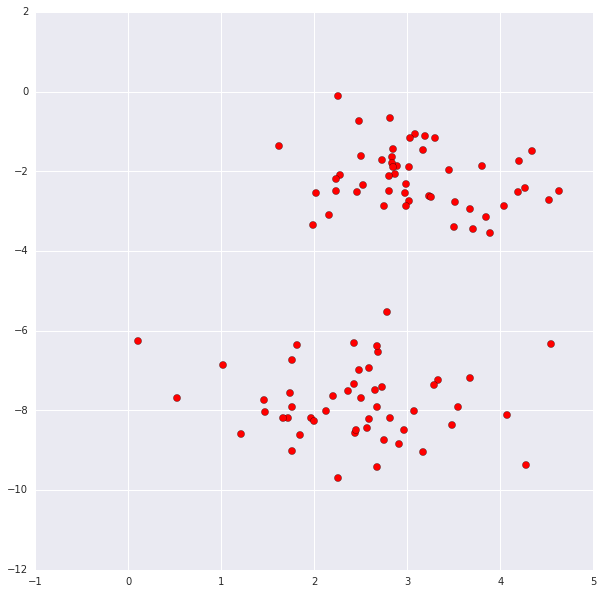

In [737]:
#Make data blobs sklearn method
from sklearn.datasets.samples_generator import make_blobs
x_var, y_var = make_blobs(n_samples = 100, centers=2, 
                  cluster_std = .8,random_state=1011)

#CRATING X and Y VARIABLES
x_val = x_var[:,0]
y_val = x_var[:,1]

#creating a scatterplot of the data blobs
plt.rcParams['figure.figsize'] = (10,10)
plt.scatter(x_val,y_val,cmap='prism',s=50,c='r')
plt.show()

## 2. PREPROCESSING

#### This algorithm works best when the data is rescaled to have a mean-value of 0 and a variance  of 1 (unit variance)
><b>*Preprocessing is explored in more depth in the A2 section of the project

#### SCALING THE DATA USING THE SKLEARN SCALE FUNCTIONALITY:

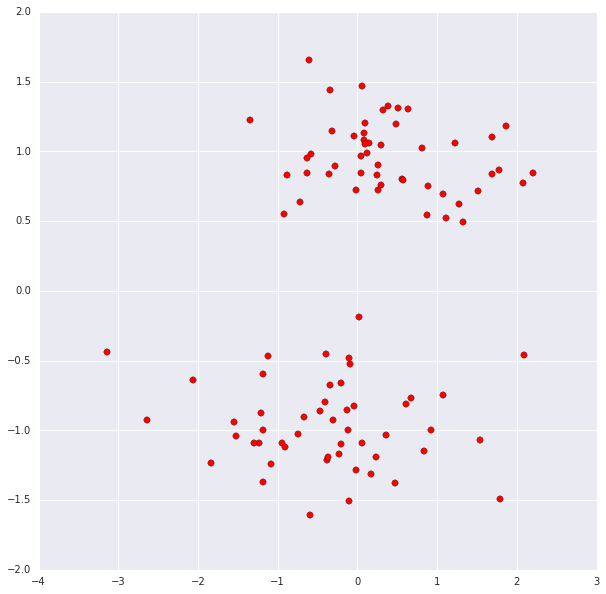

In [874]:
from sklearn.preprocessing import scale

x_var = scale(x_var)

x_val = x_var[:,0]
y_val = x_var[:,1]

plt.scatter(x_val,y_val,s=40,c='r')
plt.show()

---

## 3. FITTING A MODEL TO THE DATA WITH SKLEARN:

#### The sklearn interface makes it superbly easy to implementin SVMs with two lines of code:

In [739]:
model = SVC(kernel='linear', C=1E10)
model.fit(x_var,y_var)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### The model this algorithm generates will form the foundation for the following exploration.   

---

## 4. THE ALGORITHM: SUPPORT VECTOR MACHINE BASICS

<b>
The Support Vector Machines algorithm can classify a dataset as belonging to a specific grouping of data points. In the above dataset, there are two clusters (groups) of data. Here the algorithm should be able to identify the groups, and predict which group additional data points would belong to given their x and y coordinates. 
</b>

<b>
The general flow of the algorithm is:   

</b>
<b>
4A. Identify each classification category   
4B. Identify the points of each grouping that are closest to the other grouping  
4C. Based on these closest points, create a decision boundary that will be used to classify additional data.


>## 4A. IDENTIFY THE CLASS CATEGORIES: 
><b>The classification for the algorithm is pulled in alongside the data. Below the groups are represented by different colors. 


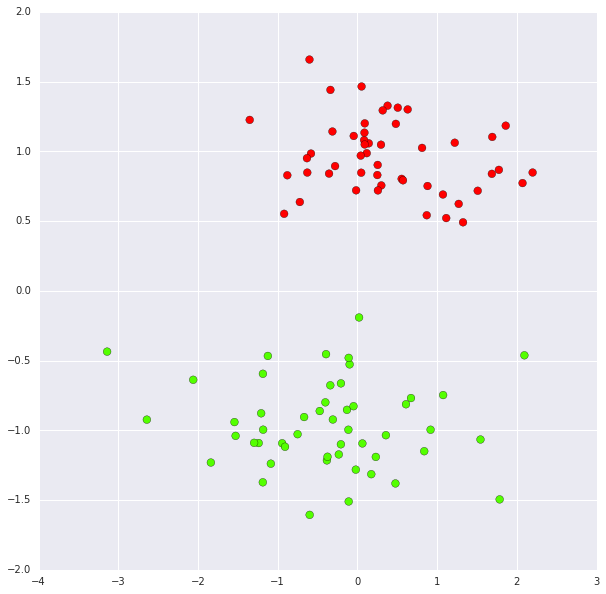

In [740]:
plt.rcParams['figure.figsize']=(10,10)
line = np.linspace(-4, 4)
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)
plt.show()

>## <b> 4B. The support vector algorithm looks at the the three closest points of one cluster to another. 

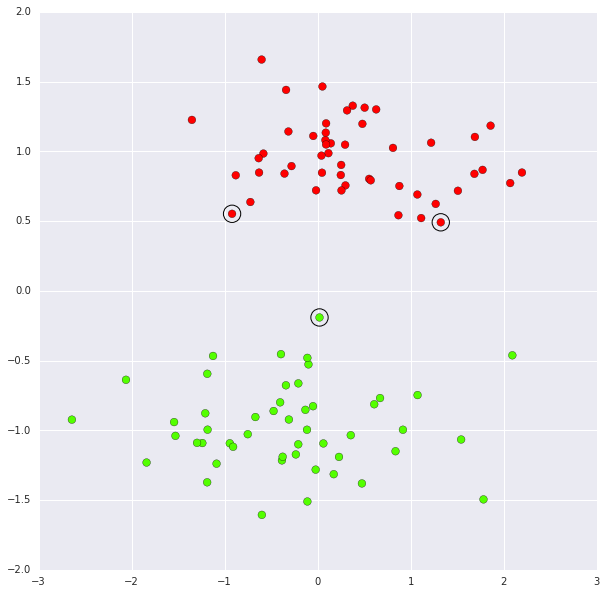

In [990]:
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)

# plot support vectors helper function
def plot_support_vectors():
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, linewidth=1, facecolors='none');

plt.rcParams['figure.figsize'] = (10,10)
plot_support_vectors()
plt.xlim(-3, 3)
plt.ylim(-2,2)
plt.show()

><b>The three points above can be displayed from the fitted SKLEARN SVC model. 

In [900]:
sv = model.support_vectors_
sv

array([[ 1.32474322,  0.49099539],
       [-0.91938568,  0.55205622],
       [ 0.02074635, -0.19112947]])

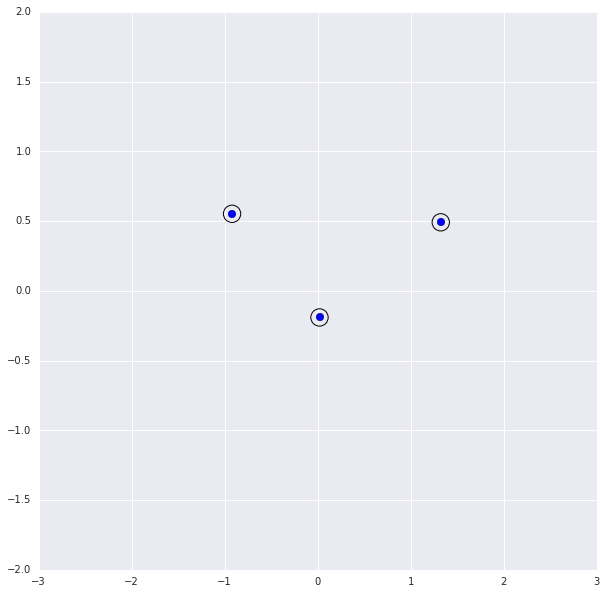

In [991]:
for x in range(len(sv)):
    plt.scatter(sv[x][0],sv[x][1],s=60)
    
# plot support vectors helper function
def plot_support_vectors():
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, linewidth=1, facecolors='none');

plot_support_vectors()
plt.xlim(-3, 3)
plt.ylim(-2,2) 
plt.show()

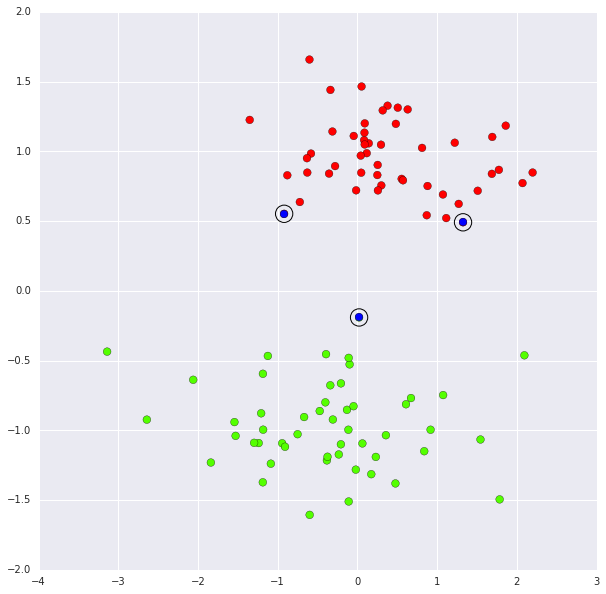

In [992]:
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)
for x in range(len(sv)):
    plt.scatter(sv[x][0],sv[x][1],s=60,c='b')
plot_support_vectors()

plt.show()

---

>## 4C. CALCULATE THE DECISION BOUNDARY

### The slope of the decision boundary the algorithm uses to classify new data is a line that passes through the first two closest points of one group to the other.  

<b> In this case, that's sv[0] and sv[1]

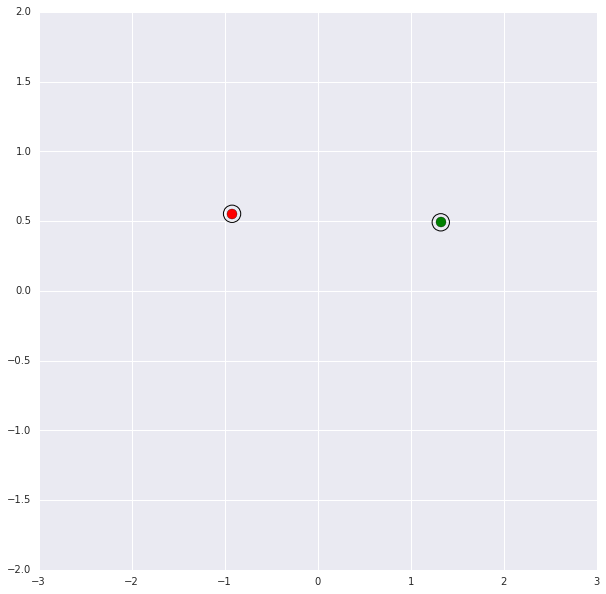

In [904]:
#SV0: Green
plt.scatter(sv[0][0],sv[0][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[0][0],sv[0][1],s=100,c='g')

#SV1: Red
plt.scatter(sv[1][0],sv[1][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[1][0],sv[1][1],s=100,c='r')

plt.xlim(-3, 3)
plt.ylim(-2,2) 
plt.show()

#### The slope of this line is the rate of change between the x and y values (rise over run)


In [905]:
#red
x1 = sv[1][0]
y1 = sv[1][1]

#green
x2 = sv[0][0]
y2 = sv[0][1]

print("Green_point x_value: %f") % x2
print("Green_point y_value: %f") % y2
print("Red_point x_value: %f") % x1
print("Red_point y_value: %f") % y1

slope = (y2-y1) / (x2-x1)
print('Slope: %f') % slope

Green_point x_value: 1.324743
Green_point y_value: 0.490995
Red_point x_value: -0.919386
Red_point y_value: 0.552056
Slope: -0.027209


#### If the slope is known along with the x and y value of a line, the intercept can be derived. 
<b>The intercept of the line that passes through the red point is:</b >

In [906]:
print("Red_point x_value: %f") % x1
print("Red_point y_value: %f") % y1
print('y_value = slope*x_value + y_intercept')
print('y_intercept = y_value - slope*x_value')
y_intercept = y1 - slope*x1
print("y_intercept: %f") % y_intercept

Red_point x_value: -0.919386
Red_point y_value: 0.552056
y_value = slope*x_value + y_intercept
y_intercept = y_value - slope*x_value
y_intercept: 0.527041


#### To plot the resulting line for x-values from -3 to 3:

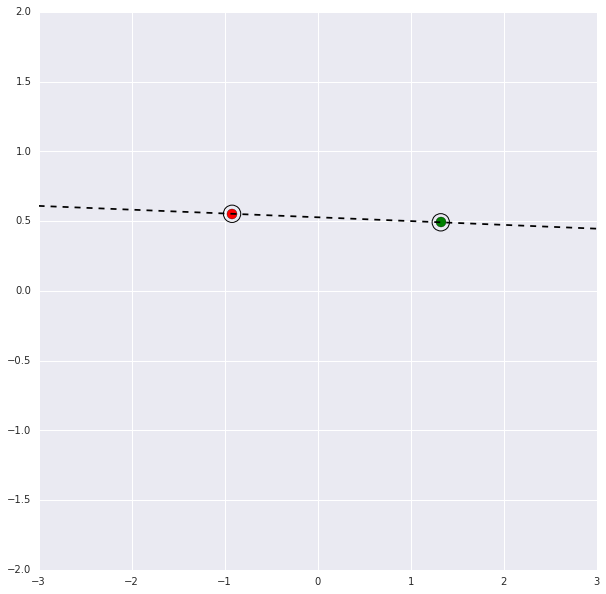

In [907]:
x_values = np.linspace(-3,3)
y_values = [((slope*x)+y_intercept) for x in x_values]

plt.plot(x_values,y_values,color = 'k',ls='dashed')

#SV0: Green
plt.scatter(sv[0][0],sv[0][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[0][0],sv[0][1],s=100,c='g')

#SV1: Red
plt.scatter(sv[1][0],sv[1][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[1][0],sv[1][1],s=100,c='r')

plt.xlim(-3, 3)
plt.ylim(-2,2)
plt.show()

### HERE IS WHAT WE HAVE SO FAR:

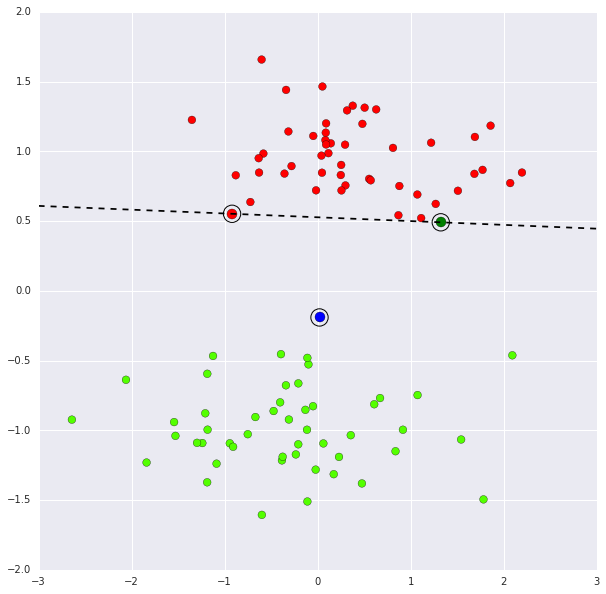

In [908]:
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)

#SV0: Green
plt.scatter(sv[0][0],sv[0][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[0][0],sv[0][1],s=100,c='g')

#SV1: Red
plt.scatter(sv[1][0],sv[1][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[1][0],sv[1][1],s=100,c='r')

#SV2: Blue
plt.scatter(sv[2][0],sv[2][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[2][0],sv[2][1],s=100,c='b')

#THE FIRST SUPPORT VECTOR
x_values = np.linspace(-3,3)
y_values = [((slope*x)+y_intercept) for x in x_values]
plt.plot(x_values,y_values,color = 'k',ls='dashed')

plt.xlim(-3, 3)
plt.ylim(-2,2)
plt.show()

### Following a similar process to generate a support vector from the closest point of the green cluster to the red cluster:


In [895]:
#BLUE DATA_POINT
x3 = sv[2][0]
y3 = sv[2][1]

In [911]:
print("Blue_point x_value: %f") % x3
print("Blue_point y_value: %f") % y3
print('y_value = slope*x_value + y_intercept')
print('y_intercept = y_value - slope*x_value')
y_intercept_2 = y3 - slope*x3
print("y_intercept: %f") % y_intercept_2

Blue_point x_value: 0.020746
Blue_point y_value: -0.191129
y_value = slope*x_value + y_intercept
y_intercept = y_value - slope*x_value
y_intercept: -0.190565


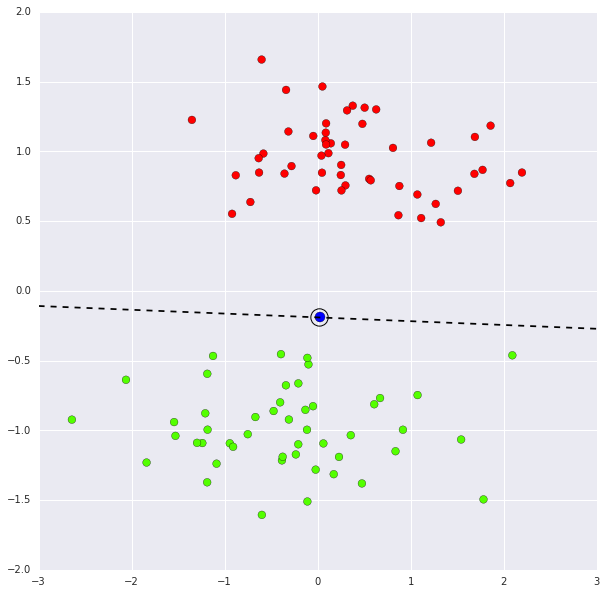

In [915]:
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)

x_values_3 = np.linspace(-3,3)
y_values_3 = [((slope*x)+y_intercept_2) for x in x_values_3]
plt.plot(x_values_3,y_values_3,color = 'k',ls='dashed')
plt.xlim(-3, 3)
plt.ylim(-2,2)

plt.scatter(sv[2][0],sv[2][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[2][0],sv[2][1],s=100,c='b')

plt.show()

#### WHAT THE SUPPORT VECTORS LOOK LIKE:

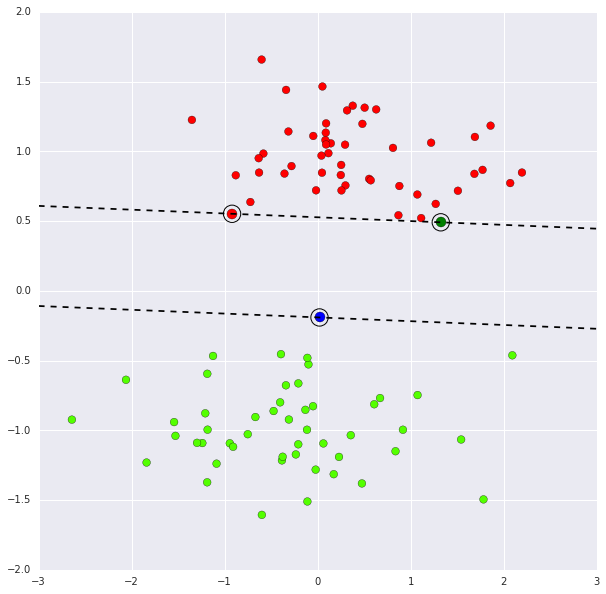

In [913]:
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)

#SV0: Green
plt.scatter(sv[0][0],sv[0][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[0][0],sv[0][1],s=100,c='g')

#SV1: Red
plt.scatter(sv[1][0],sv[1][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[1][0],sv[1][1],s=100,c='r')

#SV2: Blue
plt.scatter(sv[2][0],sv[2][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[2][0],sv[2][1],s=100,c='b')

#SUPPORT VECTORS
plt.plot(x_values,y_values,color = 'k',ls='dashed')
plt.plot(x_values_3,y_values_3,color = 'k',ls='dashed')

plt.xlim(-3, 3)
plt.ylim(-2,2)
plt.show()

### The distance between the two lines is the distance between the support vectors of the two clusters. This is the margin between the clusters.


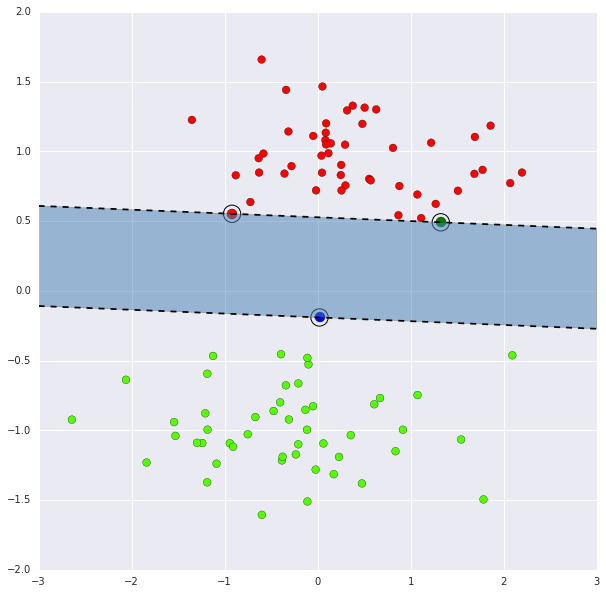

In [919]:
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)

#SV0: Green
plt.scatter(sv[0][0],sv[0][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[0][0],sv[0][1],s=100,c='g')

#SV1: Red
plt.scatter(sv[1][0],sv[1][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[1][0],sv[1][1],s=100,c='r')

#SV2: Blue
plt.scatter(sv[2][0],sv[2][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[2][0],sv[2][1],s=100,c='b')

#SUPPORT VECTORS
plt.plot(x_values,y_values,color = 'k',ls='dashed')
plt.plot(x_values_3,y_values_3,color = 'k',ls='dashed')

plt.xlim(-3, 3)
plt.ylim(-2,2)

#DRAW MARGIN
plt.fill_between(x_values_3, y_values_3, y_values, facecolor = 'SteelBlue',alpha = .5)

plt.show()

### THE DECISION BOUNDARY:
<b>Half way between the support vectors lies the decision boundary of the data set.    
This decision boundary maximizes the margin from both clusters to the other since it’s equidistant from the vectors. 

><b> To find a point the decision boundary runs through, an x_value is taken, and the y_value is computed that sits on each vector for the given x_value. The point will be half way between y_values.



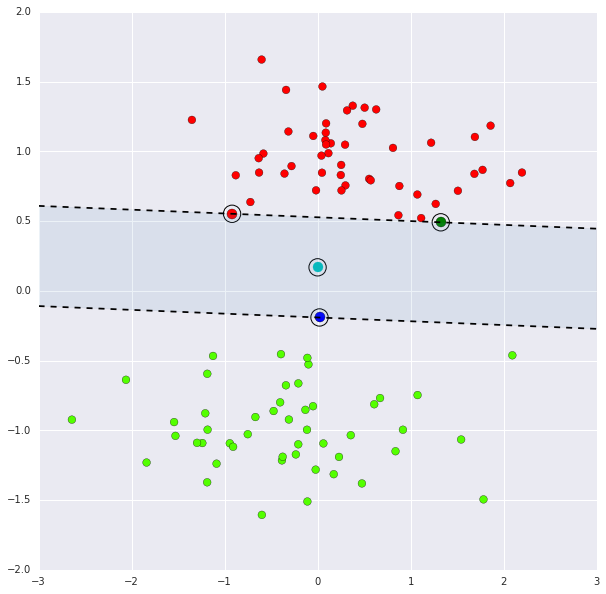

In [941]:
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)

intercept_vector_1 = y_intercept
intercept_vector_2 = y_intercept_2

x_value_for_boundary = 0
y1 = slope*x_value_for_boundary + intercept_vector_1
y2 = slope*x_value_for_boundary + intercept_vector_2
y_value_for_boundary = y1 + (y2-y1)/2

plt.scatter(x_value_for_boundary,y_value_for_boundary,s=100,color = 'c')
plt.scatter(x_value_for_boundary,y_value_for_boundary,s=300,linewidth=1,facecolor = 'none')


#----------------------------------------------------------------------------
#SV0: Green
plt.scatter(sv[0][0],sv[0][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[0][0],sv[0][1],s=100,c='g')

#SV1: Red
plt.scatter(sv[1][0],sv[1][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[1][0],sv[1][1],s=100,c='r')

#SV2: Blue
plt.scatter(sv[2][0],sv[2][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[2][0],sv[2][1],s=100,c='b')

#PLOT LINES AND FILL BETWEEN
plt.plot(x_values,y_values,color = 'k',ls='dashed')
plt.plot(x_values_3,y_values_3,color = 'k',ls='dashed')
plt.fill_between(x_values_3, y_values_3, y_values, facecolor = 'SteelBlue',alpha = .1)
#----------------------------------------------------------------------------
plt.xlim(-3, 3)
plt.ylim(-2,2)
plt.show()

### CALCULATE THE DECISION BOUNDARY:

Cyan_point x_value: 0.000000
Cyan_point y_value: 0.168238
y_value = slope*x_value + y_intercept
y_intercept = y_value - slope*x_value
y_intercept: 0.168238


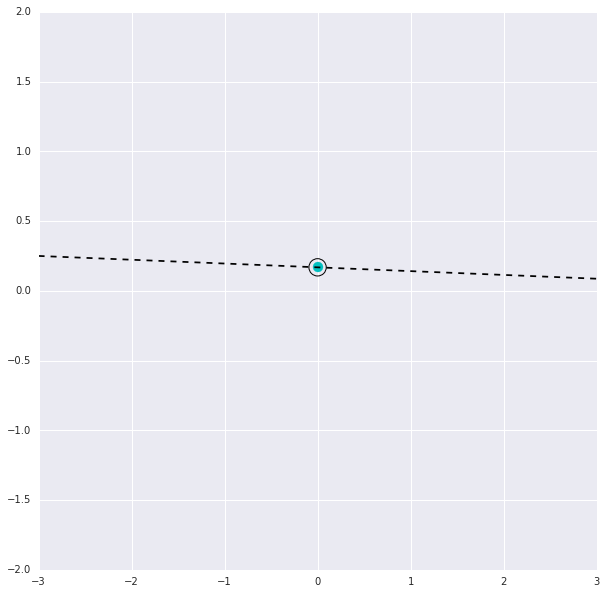

In [993]:
#DESCISION BOUNDARY DATA_POINT
x4 = x_value_for_boundary
y4 = y_value_for_boundary

print("Cyan_point x_value: %f") % x4
print("Cyan_point y_value: %f") % y4
print('y_value = slope*x_value + y_intercept')
print('y_intercept = y_value - slope*x_value')
y_intercept_3 = y4 - slope*x4
print("y_intercept: %f") % y_intercept_3

x_values_3 = np.linspace(-3,3)
y_values_3 = [((slope*x)+y_intercept_3) for x in x_values_3]

plt.plot(x_values_3,y_values_3,color = 'k',ls='dashed')
plt.scatter(x_value_for_boundary,y_value_for_boundary,s=100,color = 'c')
plt.scatter(x_value_for_boundary,y_value_for_boundary,s=300,linewidth=1,facecolor = 'none')

plt.xlim(-3, 3)
plt.ylim(-2,2)
plt.show()

### LETS MERGE THE GRAPHS TOGETHER:

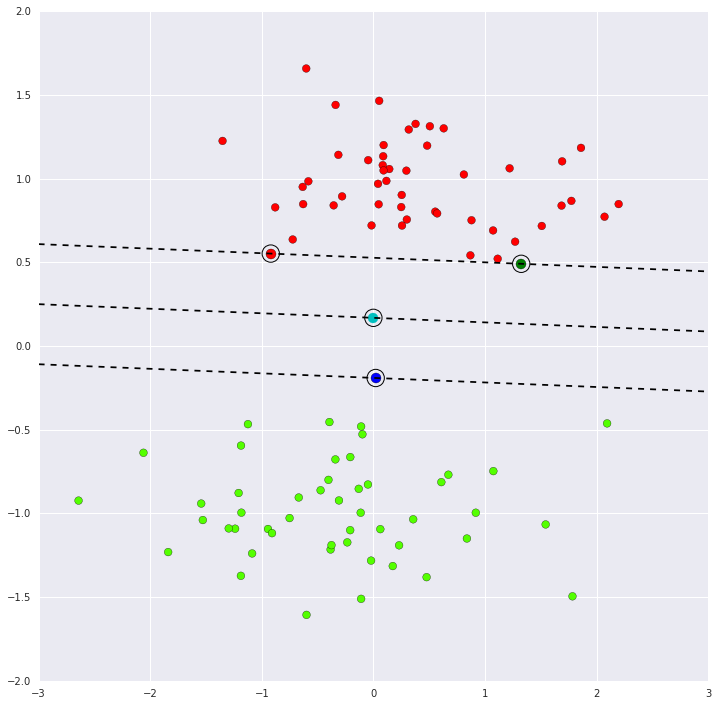

In [980]:
sns.set()
plt.rcParams['figure.figsize'] = (12,12)

plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)

#SV0: Green
plt.scatter(sv[0][0],sv[0][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[0][0],sv[0][1],s=100,c='g')

#SV1: Red
plt.scatter(sv[1][0],sv[1][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[1][0],sv[1][1],s=100,c='r')

#SV2: Blue
plt.scatter(sv[2][0],sv[2][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[2][0],sv[2][1],s=100,c='b')

plt.plot(x_values,y_values,color = 'k',ls='dashed')
plt.plot(x_values_2,y_values_2,color = 'k',ls='dashed')

#------------
x4 = x_value_for_boundary
y4 = y_value_for_boundary

y_intercept_3 = y4 - slope*x4


x_values_3 = np.linspace(-3,3)
y_values_3 = [((slope*x)+y_intercept_3) for x in x_values_3]

plt.plot(x_values_3,y_values_3,color = 'k',ls='dashed')
plt.scatter(x_value_for_boundary,y_value_for_boundary,s=100,color = 'c')
plt.scatter(x_value_for_boundary,y_value_for_boundary,s=300,linewidth=1,facecolor = 'none')
#----------------------------

plt.xlim(-3, 3)
plt.ylim(-2,2)
plt.show()

## THE HYPERPLANE

### A hyperplane is an object that has one less dimension than the dataset. It dissects the dimensional space into two. For a 2D dataset, this would be a line.   The decision boundary is a hyperplane used by the Support Vector Classifier to determine which group a new data point belongs to.


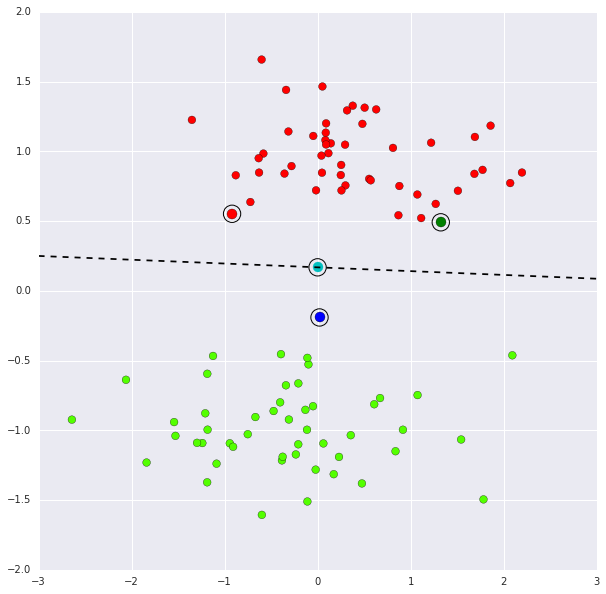

In [983]:
sns.set()
plt.rcParams['figure.figsize'] = (10,10)

plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)

#SV0: Green
plt.scatter(sv[0][0],sv[0][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[0][0],sv[0][1],s=100,c='g')

#SV1: Red
plt.scatter(sv[1][0],sv[1][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[1][0],sv[1][1],s=100,c='r')

#SV2: Blue
plt.scatter(sv[2][0],sv[2][1],s=300,linewidth=1,facecolor = 'none')
plt.scatter(sv[2][0],sv[2][1],s=100,c='b')


#------------
x4 = x_value_for_boundary
y4 = y_value_for_boundary

y_intercept_3 = y4 - slope*x4


x_values_3 = np.linspace(-3,3)
y_values_3 = [((slope*x)+y_intercept_3) for x in x_values_3]

plt.plot(x_values_3,y_values_3,color = 'k',ls='dashed')
plt.scatter(x_value_for_boundary,y_value_for_boundary,s=100,color = 'c')
plt.scatter(x_value_for_boundary,y_value_for_boundary,s=300,linewidth=1,facecolor = 'none')
#----------------------------

plt.xlim(-3, 3)
plt.ylim(-2,2)
plt.show()

---

## CLASSIFICATION BOUNDARY:

<b>
This hyperlane demarcates a decision boundary between the zones of cluster 1 and cluster 2.   

Every new  point above the hyperplane in this example would be classified as belonging to cluster 1, and below the line to cluster 2. 
</b>

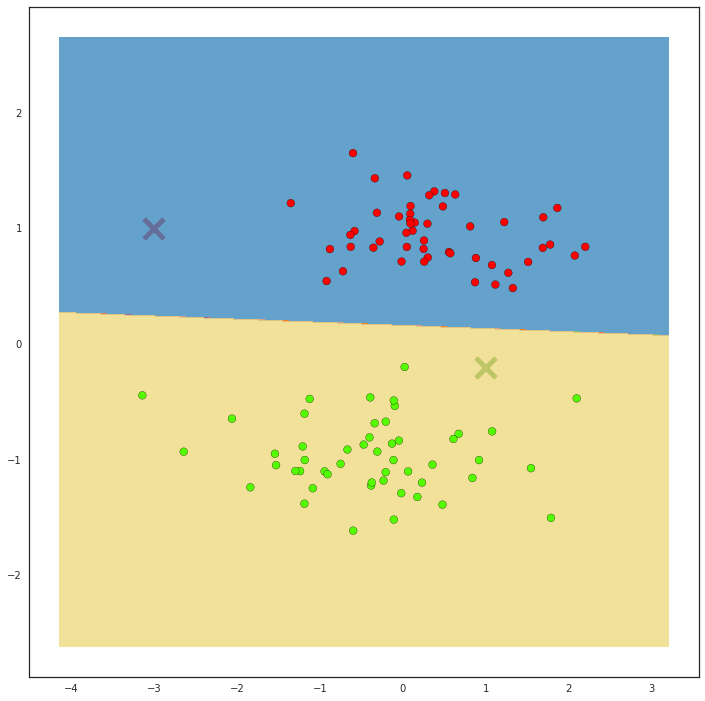

In [960]:
# plot classification zones helper function
def plot_zones(svc,data,h_value):
    h = h_value
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].mi n() - 1, data[:, 1].max() + 1
    x, y = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    z = svc.predict(np.c_[x.ravel(),y.ravel()])
    z = z.reshape(x.shape)
    plt.contourf(x, y, z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(data[:, 0], data[:, 1], c=y_var, s=60,cmap='prism')
    plt.show()

#-----------------------------------------    
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12,12)
plt.scatter(1,-.2,s=400,marker = 'x',color='green',linewidth = 5,alpha=1)
plt.scatter(-3,1,s=400,marker='x',color='red',linewidth = 5)
plot_zones(model,x_var,.002)

---

# In the rest of the project, we'll apply this algorithm to a more complex data set...

---